In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Taking a look at the data base
composite_url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=compositepars'
api_key = "&apikey="

In [3]:
# Printing url
print(composite_url + api_key)

https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=compositepars&apikey=


In [4]:
# Pulling necessary columns from NASA CSV and cleaning data with null values
nasa_original_df = pd.read_csv(composite_url)
nasa_filter_df = nasa_original_df[["fpl_hostname","fpl_letter","fpl_name","fpl_orbper","fpl_bmasse","fpl_rade","fpl_dens","fpl_eqt","fpl_insol","fst_optmag","fst_teff","fst_mass","fst_rad","fst_age"]]
nasa_clean_df = nasa_filter_df.dropna(how='any')
nasa_original_df.head()

,fpl_hostname,fpl_letter,fpl_name,fpl_discmethod,fpl_disc,fpl_controvflag,fpl_orbper,fpl_orbpererr1,fpl_orbpererr2,fpl_orbperlim,...,fst_meterr1,fst_meterr2,fst_metlim,fst_metratio,fst_metreflink,fst_age,fst_ageerr1,fst_ageerr2,fst_agelim,fst_agereflink
0,GJ 163,b,GJ 163 b,Radial Velocity,2013,0,8.63182,0.00155,-0.00155,0.0,...,0.1,-0.1,0.0,[Fe/H],<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,6.0,4.0,-4.0,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...
1,GJ 163,c,GJ 163 c,Radial Velocity,2013,0,25.63058,0.02550,-0.02550,0.0,...,0.1,-0.1,0.0,[Fe/H],<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,6.0,4.0,-4.0,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...
2,GJ 163,d,GJ 163 d,Radial Velocity,2013,0,603.95116,7.55862,-7.55862,0.0,...,0.1,-0.1,0.0,[Fe/H],<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...,6.0,4.0,-4.0,0.0,<a refstr=TUOMI_ET_AL__2013 href=https://ui.ad...
3,GJ 179,b,GJ 179 b,Radial Velocity,2009,0,2288.00000,59.00000,-59.00000,0.0,...,0.1,-0.1,0.0,[Fe/H],<a refstr=HOWARD_ET_AL__2010 href=https://ui.a...,NaN,NaN,NaN,NaN,NaN
4,GJ 317,b,GJ 317 b,Radial Velocity,2007,0,695.66000,0.35500,-0.35500,0.0,...,0.2,-0.2,0.0,[Fe/H],<a refstr=ANGLADA_ESCUDE_ET_AL__2012 href=http...,5.0,NaN,NaN,0.0,<a refstr=ANGLADA_ESCUDE_ET_AL__2012 href=http...


In [5]:
# Creating Data Set for Year and Planet Name
nasa_year_df = nasa_original_df[["fpl_name","fpl_disc", "fpl_discmethod", "fst_dist"]]
nasa_year_df = nasa_year_df.rename(columns={"fpl_name": "Planet Name", "fpl_disc": "Year Discovered", "fpl_discmethod": "Discovery Method", 
                            "fst_dist": "Distance from Earth (Parsecs)"})
nasa_year_df.head()

,Planet Name,Year Discovered,Discovery Method,Distance from Earth (Parsecs)
0,GJ 163 b,2013,Radial Velocity,15.14
1,GJ 163 c,2013,Radial Velocity,15.14
2,GJ 163 d,2013,Radial Velocity,15.14
3,GJ 179 b,2009,Radial Velocity,12.36
4,GJ 317 b,2007,Radial Velocity,15.10


In [6]:
planet_counts = nasa_year_df.groupby(["Year Discovered"]).count()
planet_counts = planet_counts.drop(columns=["Discovery Method", "Distance from Earth (Parsecs)"]).loc["2010":"2020"]
planet_counts = planet_counts.rename(columns={"Planet Name": "Number of Planets"})
planet_counts

,Number of Planets
Year Discovered,
2010,97
2011,138
2012,139
2013,125
2014,871
2015,157
2016,1505
2017,153
2018,315


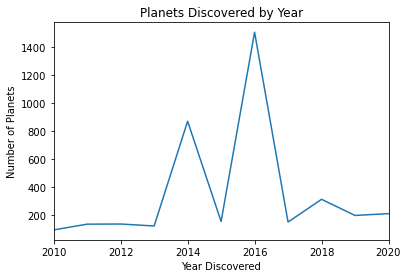

In [7]:
planet_counts["Number of Planets"].plot()
plt.xlim([2010, 2020])
plt.ylabel("Number of Planets")
plt.title("Planets Discovered by Year")
plt.savefig("Year of Discovery")

In [8]:
method = nasa_year_df.groupby(["Year Discovered", "Discovery Method"]).count()
method = method.drop(columns=["Distance from Earth (Parsecs)"])
method = method.loc[2010:2020]
method = method.rename(columns={"Planet Name": "Number of Planets"})
method.head(50)

Number of Planets
Year Discovered Discovery Method                                
2010            Eclipse Timing Variations                      2
                Imaging                                        6
                Microlensing                                   2
                Radial Velocity                               41
                Transit                                       46
2011            Eclipse Timing Variations                      5
                Imaging                                        2
                Microlensing                                   1
                Orbital Brightness Modulation                  2
                Pulsar Timing                                  1
                Radial Velocity                               47
                Transit                                       79
                Transit Timing Variations                      1
2012            Eclipse Timing Variations                      2
                Imaging                                        2
                Microlensing                                   7
                Radial Velocity                               34
                Transit                                       93
                Transit Timing Variations                      1
2013            Astrometry                                     1
                Imaging                                        7
                Microlensing                                   5
                Orbital Brightness Modulation                  1
                Radial Velocity                               32
                Transit                                       79
2014            Imaging                                        2
                Microlensing                                   6
                Orbital Brightness Modulation                  3
                Radial Velocity                               50
                Transit                                      798
                Transit Timing Variations                     12
2015            Eclipse Timing Variations                      1
                Imaging                                        5
                Microlensing                                   4
                Radial Velocity                               47
                Transit                                      100
2016            Imaging                                        2
                Microlensing                                  10
                Pulsation Timing Variations                    1
                Radial Velocity                               49
                Transit                                     1442
                Transit Timing Variations                      1
2017            Eclipse Timing Variations                      2
                Imaging                                        1
                Microlensing                                   9
                Pulsar Timing                                  2
                Radial Velocity                               49
                Transit                                       89
                Transit Timing Variations                      1
2018            Eclipse Timing Variations                      1

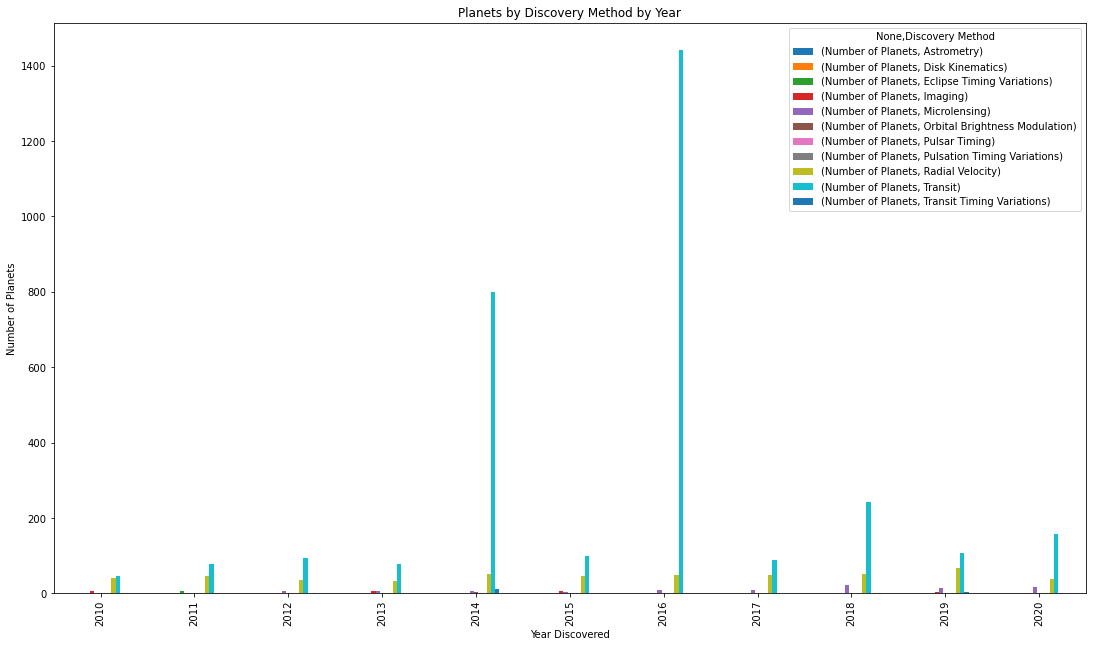

In [12]:
method.unstack().plot(kind="bar")
plt.gcf().set_size_inches(18.5, 10.5)
plt.ylabel("Number of Planets")
plt.title("Planets by Discovery Method by Year")
plt.savefig("DiscoveryMethod")